In [76]:
import pandas as pd
import numpy as np
import json
import os

from utils import parser

In [77]:
path = os.path.abspath(os.path.join(os.pardir, r'GibddStat\dtpdata\2018'))
data = parser.get_data(path)

In [78]:
df = pd.DataFrame(data)

In [79]:
df['count'] = df.groupby(['region_name', 'DTP_V'])['DTP_V'].transform('count')
df.head()

,id,year,region_name,date,Time,District,DTP_V,dead_number,injured_number,participants_number,cars_number,dtp_time_day,count
0,214540003,2018,Ненецкий АО,31.12.2018,19:30,Заполярный район,Наезд на пешехода,0,1,2,1,"В темное время суток, освещение включено",11
1,214386799,2018,Ненецкий АО,22.12.2018,22:40,Нарьян-Мар,Столкновение,0,1,3,2,"В темное время суток, освещение включено",7
2,214386798,2018,Ненецкий АО,21.12.2018,20:30,Нарьян-Мар,Столкновение,0,1,2,2,"В темное время суток, освещение включено",7
3,213836720,2018,Ненецкий АО,20.11.2018,15:40,Нарьян-Мар,Наезд на пешехода,1,0,2,1,"В темное время суток, освещение включено",11
4,213869148,2018,Ненецкий АО,19.11.2018,07:35,Заполярный район,Наезд на препятствие,0,1,2,1,Светлое время суток,2


In [6]:
## Общая статистика по типам ДТП (суммарно по всем регионам)
df[['DTP_V', 'count']].groupby('DTP_V').aggregate('count').sort_values('count')

,count
DTP_V,
"Возгорание вследствие технической неисправности движущегося или остановившегося ТС, участвующего в дорожном движении.",4
Наезд на внезапно возникшее препятствие,18
Наезд на гужевой транспорт,19
Падение груза,20
"Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы",40
"Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность",47
Отбрасывание предмета,66
"Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ",83
Наезд на животное,286


In [80]:
## Статистика по типам ДТП со смертельными случаями (суммарно по всем регионам)
df_death = df[df['dead_number'] > 0]
df_death[['DTP_V', 'count']].groupby('DTP_V').aggregate('count').sort_values('count')

,count
DTP_V,
Наезд на внезапно возникшее препятствие,2
"Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы",2
Падение груза,4
Отбрасывание предмета,4
Наезд на гужевой транспорт,6
"Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность",11
"Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ",22
Наезд на животное,27
Падение пассажира,42


In [10]:
## Часть дня в которую совершаются ДТП с погибшими
df_death['dtp_time_day'].value_counts(normalize=True) * 100

Светлое время суток                            47.269064
В темное время суток, освещение отсутствует    29.812281
В темное время суток, освещение включено       18.209778
Сумерки                                         3.319546
В темное время суток, освещение не включено     1.389331
Name: dtp_time_day, dtype: float64

In [16]:
## 5 наиболее частых видов ДТП по количеству жертв
top5_death = df_death['DTP_V'].value_counts(normalize=True) * 100
top5_death[:5]

Столкновение            36.366529
Наезд на пешехода       32.940927
Опрокидывание           12.249443
Наезд на препятствие     8.272351
Наезд на стоящее ТС      3.308941
Name: DTP_V, dtype: float64

In [21]:
## Сумма и средние значения смертности и травмированности в ДТП по времени суток
df_death[['dtp_time_day', 'dead_number', 'injured_number', 'DTP_V']].groupby(['dtp_time_day']).aggregate(['sum', 'mean'])

dead_number            \
                                                    sum      mean   
dtp_time_day                                                        
В темное время суток, освещение включено           1910  1.112405   
В темное время суток, освещение не включено         145  1.106870   
В темное время суток, освещение отсутствует        3350  1.191747   
Светлое время суток                                5353  1.201032   
Сумерки                                             382  1.220447   

                                            injured_number            
                                                       sum      mean  
dtp_time_day                                                          
В темное время суток, освещение включено               914  0.532324  
В темное время суток, освещение не включено             78  0.595420  
В темное время суток, освещение отсутствует           1893  0.673426  
Светлое время суток                                   3949  0.886022  
Сумерки                                                254  0.811502

In [42]:
## Статистика ДТП в каждом регионе
df[['count', 'region_name']].groupby(['region_name']).aggregate('count')


,count
region_name,
Еврейская автономная область,247
Забайкальский край,1365
Кабардино-Балкарская Республика,608
Карачаево-Черкесская Республика,526
Курганская область,1183
Курская область,1600
Ленинградская область,2964
Липецкая область,1559
Магаданская область,247


In [82]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [158]:
p_df = df[df['DTP_V'] == 'Наезд на пешехода']
p_df['date'].head()

0     31.12.2018
3     20.11.2018
5     09.11.2018
7     18.10.2018
10    03.10.2018
Name: date, dtype: object

In [204]:
p_df_by_date = p_df[['count', 'date']].groupby(['date']).aggregate('count').reset_index()

p_df_by_date['date'] = p_df_by_date['date'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y').date())
p_df_by_date = p_df_by_date.sort_values('date')

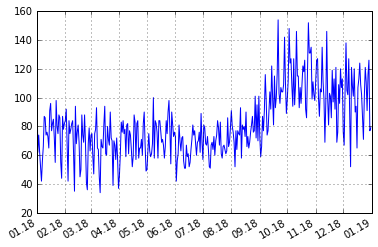

In [205]:
import matplotlib.dates as mdates
from datetime import datetime


## График показывающий отношение количество сбитых пешеходов к дате
months = mdates.MonthLocator()  # every month
date_fmt = mdates.DateFormatter('%m.%y')

fig, ax = plt.subplots()

ax.plot('date', 'count', data=p_df_by_date)

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(date_fmt)
ax.grid(True)

# round to nearest years.
datemin = np.datetime64(p_df_by_date['date'][0])
datemax = np.datetime64(p_df_by_date['date'].iloc[-1], 'M') + np.timedelta64(1, 'M')
ax.set_xlim(datemin, datemax)


fig.autofmt_xdate()